In [1]:
from fastai.vision.data import URLs, untar_data
path = untar_data(URLs.MNIST)

In [2]:
path.ls()

(#2) [Path('C:/Users/TAGCH/.fastai/data/mnist_png/testing'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training')]

In [3]:
(path/'training').ls()

(#10) [Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/0'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/1'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/2'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/4'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/5'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/6'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/7'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/8'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/9')]

In [4]:
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
zeros = (path/'training'/'0').ls().sorted()
threes

(#6131) [Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10000.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10011.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10031.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10034.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10042.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10052.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/1007.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10074.png'),Path('C:/Users/TAGCH/.fastai/data/mnist_png/training/3/10091.png')...]

As we might expect, it’s full of image files. Let’s take a look at one now. Here’s an
image of a handwritten number 3, taken from the famous MNIST dataset of hand‐
written numbers:

In [5]:
from PIL import Image

im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In a computer, everything is represented as a number. To view the numbers that make
up this image, we have to convert it to a NumPy array or a PyTorch tensor. For
instance, here’s what a section of the image looks like converted to a NumPy array:

In [6]:
import numpy as np

np.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

The 4:10 indicates we requested the rows from index 4 (inclusive) to 10 (noninclu‐
sive), and the same for the columns. NumPy indexes from top to bottom and from
left to right, so this section is located near the top-left corner of the image. Here’s the
same thing as a PyTorch tensor:

In [7]:
import torch

im3_array = np.array(im3)

# Convert the cropped array to a PyTorch tensor
copy_tensor = torch.tensor(im3_array)
copy_tensor[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

We can slice the array to pick just the part with the top of the digit in it, and then use
a Pandas DataFrame to color-code the values using a gradient, which shows us clearly
how the image is created from the pixel values:

In [8]:
import pandas as pd

im3_t = copy_tensor
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


We will use Jupyter to do some little checks of our work along the way—in this case,
making sure that the number of returned items seems reasonable:

In [9]:
from PIL import Image
import torch
import numpy as np

# Assuming `sevens` and `threes` are lists of file paths to images
one_tensors = [torch.tensor(np.array(Image.open(o))) for o in ones]
two_tensors = [torch.tensor(np.array(Image.open(o))) for o in twos]
three_tensors = [torch.tensor(np.array(Image.open(o))) for o in threes]
four_tensors = [torch.tensor(np.array(Image.open(o))) for o in fours]
five_tensors = [torch.tensor(np.array(Image.open(o))) for o in fives]
six_tensors = [torch.tensor(np.array(Image.open(o))) for o in sixes]
seven_tensors = [torch.tensor(np.array(Image.open(o))) for o in sevens]
eight_tensors = [torch.tensor(np.array(Image.open(o))) for o in eights]
nine_tensors = [torch.tensor(np.array(Image.open(o))) for o in nines]
zero_tensors = [torch.tensor(np.array(Image.open(o))) for o in zeros]
len(one_tensors), len(two_tensors), len(three_tensors), len(four_tensors), len(five_tensors), len(six_tensors),len(seven_tensors), len(eight_tensors), len(nine_tensors), len(zero_tensors)


(6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923)

We’ll also check that one of the images looks OK. Since we now have tensors (which
Jupyter by default will print as values), rather than PIL images (which Jupyter by
default will display images), we need to use fastai’s show_image function to display it:

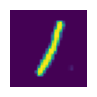

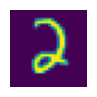

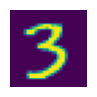

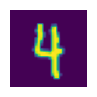

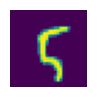

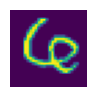

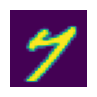

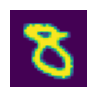

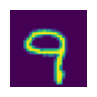

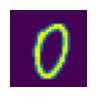

In [10]:
from fastai.vision.core import show_image
show_image(one_tensors[1]);
show_image(two_tensors[1]);
show_image(three_tensors[1]);
show_image(four_tensors[1]);
show_image(five_tensors[1]);
show_image(six_tensors[1]);
show_image(seven_tensors[1]);
show_image(eight_tensors[1]);
show_image(nine_tensors[1]);
show_image(zero_tensors[1]);

Generally, when images are floats, the pixel values are expected to be between 0 and 1,
so we will also divide by 255 here:

In [11]:
import torch

stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixs = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255
stacked_zeros = torch.stack(zero_tensors).float()/255

stacked_ones.shape

torch.Size([6742, 28, 28])

The length of a tensor’s shape is its rank:

In [12]:
len(stacked_threes.shape)

3

We can also get a tensor’s rank directly with ndim:

In [13]:
stacked_threes.ndim

3

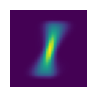

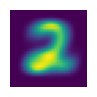

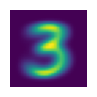

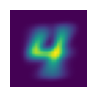

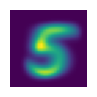

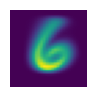

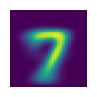

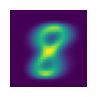

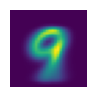

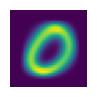

In [14]:
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixs.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)
mean0 = stacked_zeros.mean(0)

show_image(mean1);
show_image(mean2);
show_image(mean3);
show_image(mean4);
show_image(mean5);
show_image(mean6);
show_image(mean7);
show_image(mean8);
show_image(mean9);
show_image(mean0);

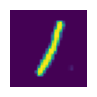

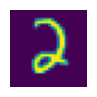

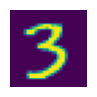

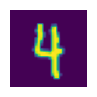

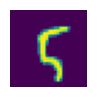

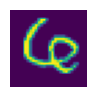

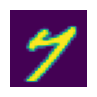

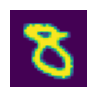

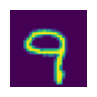

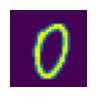

In [15]:
a_1 = stacked_ones[1]
a_2 = stacked_twos[1]
a_3 = stacked_threes[1]
a_4 = stacked_fours[1]
a_5 = stacked_fives[1]
a_6 = stacked_sixs[1]
a_7 = stacked_sevens[1]
a_8 = stacked_eights[1]
a_9 = stacked_nines[1]
a_0 = stacked_zeros[1]

show_image(a_1);
show_image(a_2);
show_image(a_3);
show_image(a_4);
show_image(a_5);
show_image(a_6);
show_image(a_7);
show_image(a_8);
show_image(a_9);
show_image(a_0);

- Take the mean of the absolute value of differences (absolute value is the function
that replaces negative values with positive values). This is called the mean abso‐
lute difference or L1 norm.
- Take the mean of the square of differences (which makes everything positive) and
then take the square root (which undoes the squaring). This is called the root
mean squared error (RMSE) or L2 norm.

Let’s try both of these now:

In [16]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [17]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

PyTorch already provides both of these as loss functions. You’ll find these inside
torch.nn.functional, which the PyTorch team recommends importing as F (and is
available by default under that name in fastai):

In [18]:
import torch.nn.functional as F

F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

To create an array or tensor, pass a list (or list of lists, or list of lists of lists, etc.) to
array or tensor:

In [19]:
import numpy as np
import torch

data = [[1,2,3],[4,5,6]]
arr = np.array(data)
tns = torch.tensor(data)

arr # numpy
tns # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

You can select a row (note that, like lists in Python, tensors are 0-indexed, so 1 refers
to the second row/column):

In [20]:
tns[1]

tensor([4, 5, 6])

Or a column, by using : to indicate all of the first axis (we sometimes refer to the
dimensions of tensors/arrays as axes):

In [21]:
tns[:,1]

tensor([2, 5])

You can combine these with Python slice syntax ([start:end], with end being excluded) to select part of a row or column:

In [22]:
tns[1,1:3]

tensor([5, 6])

And you can use the standard operators, such as +, -, *, and /:

In [23]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

Tensors have a type:

In [24]:
tns.type()

'torch.LongTensor'

And will automatically change that type as needed; for example, from int to float:

In [25]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

# Computing Metrics Using Broadcasting

In [26]:
from PIL import Image
import torch
import numpy as np

valid_1_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'1').ls()])
valid_1_tens = valid_1_tens.float()/255

valid_2_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'2').ls()])
valid_2_tens = valid_2_tens.float()/255

valid_3_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_4_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'4').ls()])
valid_4_tens = valid_4_tens.float()/255

valid_5_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'5').ls()])
valid_5_tens = valid_5_tens.float()/255

valid_6_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'6').ls()])
valid_6_tens = valid_6_tens.float()/255

valid_7_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_8_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'8').ls()])
valid_8_tens = valid_8_tens.float()/255

valid_9_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'9').ls()])
valid_9_tens = valid_9_tens.float()/255

valid_0_tens = torch.stack([torch.tensor(np.array(Image.open(o)))
 for o in (path/'testing'/'0').ls()])
valid_0_tens = valid_0_tens.float()/255

valid_1_tens.shape, valid_2_tens.shape ,valid_3_tens.shape, valid_4_tens.shape, valid_5_tens.shape, valid_6_tens.shape, valid_7_tens.shape, valid_8_tens.shape, valid_9_tens.shape, valid_0_tens.shape


(torch.Size([1135, 28, 28]),
 torch.Size([1032, 28, 28]),
 torch.Size([1010, 28, 28]),
 torch.Size([982, 28, 28]),
 torch.Size([892, 28, 28]),
 torch.Size([958, 28, 28]),
 torch.Size([1028, 28, 28]),
 torch.Size([974, 28, 28]),
 torch.Size([1009, 28, 28]),
 torch.Size([980, 28, 28]))

We can write a simple function that calculates the mean absolute error using an
expression very similar to the one we wrote in the last section:

In [27]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_1, mean1)
"""
mnist_distance(a_2, mean2)
mnist_distance(a_3, mean3)
mnist_distance(a_4, mean4)
mnist_distance(a_5, mean5)
mnist_distance(a_6, mean6)
mnist_distance(a_7, mean7)
mnist_distance(a_8, mean8)
mnist_distance(a_9, mean9)
mnist_distance(a_0, mean0)
"""

'\nmnist_distance(a_2, mean2)\nmnist_distance(a_3, mean3)\nmnist_distance(a_4, mean4)\nmnist_distance(a_5, mean5)\nmnist_distance(a_6, mean6)\nmnist_distance(a_7, mean7)\nmnist_distance(a_8, mean8)\nmnist_distance(a_9, mean9)\nmnist_distance(a_0, mean0)\n'

In [28]:
valid_1_dist = mnist_distance(valid_1_tens, mean1)
valid_1_dist, valid_1_dist.shape

(tensor([0.0809, 0.0651, 0.0661,  ..., 0.0853, 0.0603, 0.0520]),
 torch.Size([1135]))

In [29]:
valid_2_dist = mnist_distance(valid_2_tens, mean2)
valid_2_dist, valid_2_dist.shape

(tensor([0.1670, 0.1256, 0.1352,  ..., 0.2008, 0.1505, 0.1435]),
 torch.Size([1032]))

In [30]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [31]:
valid_4_dist = mnist_distance(valid_4_tens, mean4)
valid_4_dist, valid_4_dist.shape

(tensor([0.1393, 0.1122, 0.1455, 0.1219, 0.1223, 0.1087, 0.1367, 0.0997, 0.1281,
         0.1799, 0.1102, 0.1166, 0.1016, 0.1093, 0.0961, 0.1533, 0.0994, 0.1085,
         0.1155, 0.1435, 0.1529, 0.1067, 0.1111, 0.1327, 0.1264, 0.1018, 0.1071,
         0.1034, 0.1097, 0.1252, 0.1385, 0.1207, 0.0999, 0.1032, 0.1164, 0.1636,
         0.1728, 0.1037, 0.1074, 0.1021, 0.1000, 0.1213, 0.1098, 0.1038, 0.1047,
         0.1087, 0.1405, 0.1001, 0.1311, 0.1244, 0.1130, 0.1347, 0.1163, 0.1634,
         0.1216, 0.1614, 0.1570, 0.1501, 0.1191, 0.1158, 0.1163, 0.1199, 0.1234,
         0.1555, 0.1379, 0.1304, 0.1024, 0.1771, 0.1028, 0.1017, 0.1384, 0.0960,
         0.1108, 0.1136, 0.1085, 0.1215, 0.1022, 0.1099, 0.1030, 0.1140, 0.1104,
         0.1152, 0.1285, 0.1274, 0.1129, 0.1098, 0.1130, 0.1108, 0.1047, 0.1367,
         0.0992, 0.1013, 0.0996, 0.1129, 0.1239, 0.1734, 0.1441, 0.1013, 0.1251,
         0.1115, 0.1183, 0.1034, 0.1089, 0.1002, 0.1023, 0.1063, 0.0993, 0.1314,
         0.1020, 0.0927, 0.1

In [32]:
valid_5_dist = mnist_distance(valid_5_tens, mean5)
valid_5_dist, valid_5_dist.shape

(tensor([0.1683, 0.1359, 0.1351, 0.1507, 0.1177, 0.1135, 0.1652, 0.1443, 0.1258,
         0.1227, 0.1386, 0.1743, 0.1312, 0.1189, 0.1286, 0.1266, 0.1283, 0.1254,
         0.1264, 0.1408, 0.1465, 0.1439, 0.1424, 0.1415, 0.1358, 0.1259, 0.1486,
         0.1191, 0.1261, 0.1648, 0.1389, 0.1220, 0.1263, 0.1146, 0.1529, 0.1455,
         0.1351, 0.1300, 0.1436, 0.1334, 0.1129, 0.1291, 0.1246, 0.1399, 0.1192,
         0.1217, 0.1308, 0.1179, 0.1264, 0.1586, 0.1468, 0.1104, 0.1293, 0.1366,
         0.1331, 0.1478, 0.1277, 0.1322, 0.1201, 0.1661, 0.1155, 0.1287, 0.1250,
         0.1372, 0.1702, 0.1321, 0.1210, 0.1271, 0.1235, 0.1170, 0.1658, 0.1490,
         0.1207, 0.1399, 0.1257, 0.1377, 0.1289, 0.1213, 0.1159, 0.1748, 0.1530,
         0.1182, 0.1345, 0.1244, 0.1650, 0.1199, 0.1203, 0.1148, 0.1621, 0.1150,
         0.1281, 0.1330, 0.1309, 0.1119, 0.1708, 0.1212, 0.1218, 0.1290, 0.1504,
         0.1232, 0.1496, 0.1440, 0.1443, 0.1119, 0.1381, 0.1198, 0.1503, 0.1216,
         0.1304, 0.1210, 0.1

In [33]:
valid_6_dist = mnist_distance(valid_6_tens, mean6)
valid_6_dist, valid_6_dist.shape

(tensor([0.1264, 0.1408, 0.1741, 0.1351, 0.1281, 0.1282, 0.1058, 0.1192, 0.1527,
         0.1366, 0.1088, 0.1372, 0.1168, 0.1340, 0.1154, 0.1743, 0.1407, 0.1366,
         0.1268, 0.1282, 0.1382, 0.1164, 0.1073, 0.1225, 0.1410, 0.1223, 0.1359,
         0.1180, 0.1059, 0.1217, 0.1195, 0.1675, 0.1319, 0.1638, 0.1003, 0.1740,
         0.1200, 0.1039, 0.1465, 0.1080, 0.1149, 0.1069, 0.1369, 0.1839, 0.1664,
         0.1156, 0.1458, 0.1196, 0.1182, 0.1235, 0.1313, 0.1528, 0.1128, 0.1286,
         0.1632, 0.1071, 0.1038, 0.1278, 0.1276, 0.1099, 0.1084, 0.1162, 0.1526,
         0.1179, 0.1032, 0.1270, 0.1111, 0.1282, 0.1086, 0.1189, 0.1469, 0.1207,
         0.1753, 0.1092, 0.1508, 0.1140, 0.1252, 0.1353, 0.1108, 0.1135, 0.1641,
         0.1502, 0.1033, 0.1395, 0.1322, 0.1162, 0.1065, 0.1108, 0.1269, 0.1461,
         0.1134, 0.1232, 0.1024, 0.1224, 0.1222, 0.1214, 0.1049, 0.1375, 0.1145,
         0.1377, 0.1071, 0.1217, 0.0969, 0.1015, 0.1366, 0.1533, 0.1007, 0.1362,
         0.1463, 0.1825, 0.1

In [34]:
valid_7_dist = mnist_distance(valid_7_tens, mean7)
valid_7_dist, valid_7_dist.shape

(tensor([0.0874, 0.0971, 0.1050,  ..., 0.0893, 0.0983, 0.0977]),
 torch.Size([1028]))

In [35]:
valid_8_dist = mnist_distance(valid_8_tens, mean8)
valid_8_dist, valid_8_dist.shape

(tensor([0.1124, 0.1237, 0.1195, 0.1166, 0.1408, 0.1455, 0.1231, 0.1321, 0.1159,
         0.1227, 0.2015, 0.1268, 0.1143, 0.1172, 0.1459, 0.1318, 0.1665, 0.1310,
         0.1608, 0.1306, 0.1464, 0.1334, 0.1182, 0.1222, 0.1444, 0.1555, 0.1145,
         0.1424, 0.1526, 0.1326, 0.1290, 0.1148, 0.1180, 0.1255, 0.1797, 0.1179,
         0.1186, 0.1618, 0.1123, 0.1225, 0.1334, 0.1293, 0.1100, 0.1542, 0.1363,
         0.1393, 0.1406, 0.1348, 0.1401, 0.1111, 0.1179, 0.1446, 0.1362, 0.1190,
         0.1723, 0.1286, 0.1385, 0.1238, 0.1647, 0.1190, 0.1483, 0.1107, 0.1415,
         0.1635, 0.1324, 0.1104, 0.1152, 0.1249, 0.1122, 0.1416, 0.1101, 0.1436,
         0.1250, 0.1190, 0.1246, 0.1430, 0.1188, 0.1291, 0.1303, 0.1605, 0.1052,
         0.1380, 0.1118, 0.1633, 0.1444, 0.1181, 0.1311, 0.1787, 0.1205, 0.1290,
         0.1654, 0.1189, 0.1403, 0.1213, 0.1308, 0.1254, 0.1617, 0.1145, 0.1478,
         0.1689, 0.1490, 0.1453, 0.1258, 0.1198, 0.1212, 0.1181, 0.1434, 0.1220,
         0.1201, 0.1315, 0.1

In [36]:
valid_9_dist = mnist_distance(valid_9_tens, mean9)
valid_9_dist, valid_9_dist.shape

(tensor([0.1106, 0.0893, 0.0964,  ..., 0.1153, 0.1071, 0.1164]),
 torch.Size([1009]))

In [37]:
valid_0_dist = mnist_distance(valid_0_tens, mean0)
valid_0_dist, valid_0_dist.shape

(tensor([0.1298, 0.1337, 0.1540, 0.1250, 0.1302, 0.1468, 0.1473, 0.1413, 0.1394,
         0.1521, 0.1197, 0.1534, 0.1626, 0.1220, 0.1701, 0.1334, 0.1571, 0.1269,
         0.1490, 0.1591, 0.1765, 0.1235, 0.1488, 0.1718, 0.1143, 0.1653, 0.1636,
         0.1639, 0.1193, 0.1192, 0.1279, 0.1214, 0.1359, 0.1426, 0.1404, 0.1509,
         0.1654, 0.1431, 0.1387, 0.1333, 0.1218, 0.1225, 0.1491, 0.1592, 0.1622,
         0.1220, 0.1390, 0.1264, 0.1172, 0.1826, 0.1295, 0.1467, 0.1348, 0.1576,
         0.1359, 0.1375, 0.1423, 0.1759, 0.1350, 0.1939, 0.1397, 0.1559, 0.1598,
         0.1581, 0.1274, 0.1749, 0.1487, 0.1430, 0.1593, 0.1408, 0.1148, 0.1343,
         0.1228, 0.1763, 0.1416, 0.1578, 0.1357, 0.1334, 0.1457, 0.1270, 0.1329,
         0.1438, 0.1521, 0.1653, 0.1191, 0.1610, 0.1607, 0.1551, 0.1525, 0.1352,
         0.1769, 0.1640, 0.1272, 0.1402, 0.1441, 0.1281, 0.1413, 0.1373, 0.1212,
         0.1536, 0.1650, 0.1493, 0.1546, 0.1239, 0.1667, 0.1354, 0.1472, 0.1313,
         0.1205, 0.1188, 0.1

In [38]:
torch.tensor([1,2,3]) + torch.tensor([1,1,1])

tensor([2, 3, 4])

In [39]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

We can use mnist_distance to figure out whether an image is a 3 by using the fol‐
lowing logic: if the distance between the digit in question and the ideal 3 is less than
the distance to the ideal 7, then it’s a 3. This function will automatically do broadcast‐
ing and be applied elementwise, just like all PyTorch functions and operators:

In [40]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [41]:
def is_0(x): 
    return mnist_distance(x, mean0) < mnist_distance(x, mean1)

def is_1(x): 
    return mnist_distance(x, mean1) < mnist_distance(x, mean2)

def is_2(x): 
    return mnist_distance(x, mean2) < mnist_distance(x, mean3)
def is_3(x): 
    return mnist_distance(x, mean3) < mnist_distance(x, mean4)

def is_4(x): 
    return mnist_distance(x, mean4) < mnist_distance(x, mean5)

def is_5(x): 
    return mnist_distance(x, mean5) < mnist_distance(x, mean6)

def is_6(x): 
    return mnist_distance(x, mean6) < mnist_distance(x, mean7)

def is_7(x): 
    return mnist_distance(x, mean7) < mnist_distance(x, mean8)

def is_8(x): 
    return mnist_distance(x, mean8) < mnist_distance(x, mean9)

def is_9(x): 
    return mnist_distance(x, mean9) < mnist_distance(x, mean0)

Let’s test it on our example case:

In [42]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Note that when we convert the Boolean response to a float, we get 1.0 for True and
0.0 for False.
Thanks to broadcasting, we can also test it on the full validation set of 3s:

In [43]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

Now we can calculate the accuracy for each of the 3s and 7s, by taking the average of
that function for all 3s and its inverse for all 7s:

In [44]:
accuracy_1s = is_1(valid_1_tens).float() .mean()
accuracy_2s = is_2(valid_2_tens).float() .mean()
accuracy_3s = is_3(valid_3_tens).float() .mean()
accuracy_4s = is_4(valid_4_tens).float() .mean()
accuracy_5s = is_5(valid_5_tens).float() .mean()
accuracy_6s = is_6(valid_6_tens).float() .mean()
accuracy_7s = is_7(valid_7_tens).float() .mean()
accuracy_8s = is_8(valid_8_tens).float() .mean()
accuracy_9s = is_9(valid_9_tens).float() .mean()
accuracy_0s = is_0(valid_0_tens).float() .mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9604), tensor(0.9708), tensor(0.9656))

## Stochastic Gradient Descent

In [45]:
def f(x): return x**2

In [46]:
import matplotlib.pyplot as plt

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, steps=100, figsize=(6,4)):
    x = torch.linspace(min, max, steps=steps)
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, f(x))
    if tx is not None:
        ax.set_xlabel(tx)
    if ty is not None:
        ax.set_ylabel(ty)
    if title is not None:
        ax.set_title(title)

In [47]:
from utils import *

plot_function(f, 'x', 'x**2')

ModuleNotFoundError: No module named 'utils'

The sequence of steps we described earlier starts by picking a random value for a
parameter, and calculating the value of the loss:

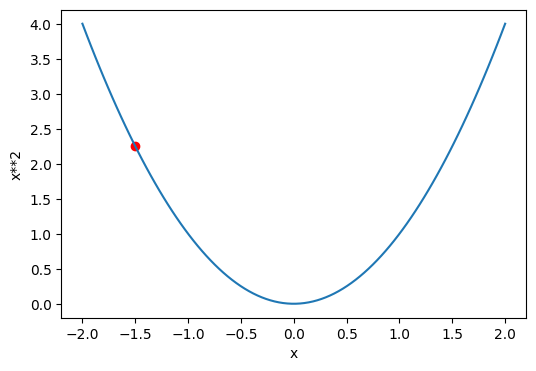

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

## Calculating Gradients

In [ ]:
xt = torch.tensor(3.).requires_grad_()

Now we calculate our function with that value. Notice how PyTorch prints not just
the value calculated, but also a note that it has a gradient function it’ll be using to cal‐
culate our gradients when needed:

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt = torch.tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## An End-to-End SGD Example

In [ ]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

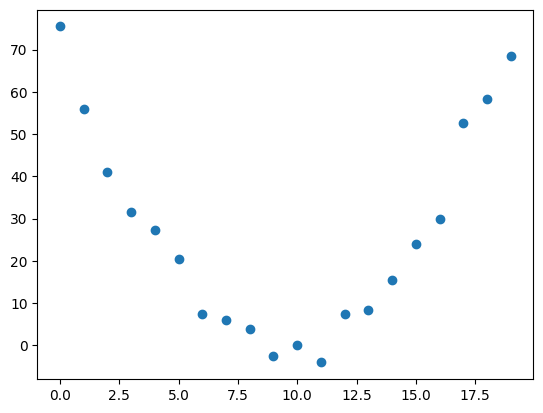

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [ ]:
def f(t, params):
 a,b,c = params
 return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean()

**Step 1: Initialize the parameters**<br>
First, we initialize the parameters to random values and tell PyTorch that we want to
track their gradients using requires_grad_:

In [ ]:
params = torch.randn(3).requires_grad_()

**Step 2: Calculate the predictions**<br>
Next, we calculate the predictions:

In [ ]:
preds = f(time, params)

Let’s create a little function to see how close our predictions are to our targets, and
take a look:

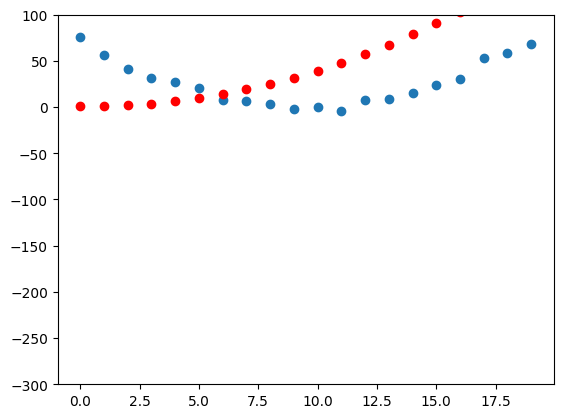

In [ ]:
def show_preds(preds, ax=None):
 if ax is None: ax=plt.subplots()[1]
 ax.scatter(time, speed)
 ax.scatter(time, preds.detach().numpy(), color='red')
 ax.set_ylim(-300,100)
show_preds(preds)

**Step 3: Calculate the loss**<br>
We calculate the loss as follows:

In [ ]:
loss = mse(preds, speed)
loss

tensor(2653.5601, grad_fn=<MeanBackward0>)

**Step 4: Calculate the gradients**<br>
The next step is to calculate the gradients, or an approximation of how the parame‐
ters need to change:


In [ ]:
loss.backward()
params.grad

tensor([14815.5527,   954.9662,    46.6225])

In [ ]:
params.grad * 1e-5

tensor([0.1482, 0.0095, 0.0005])

We can use these gradients to improve our parameters. We’ll need to pick a learning
rate (we’ll discuss how to do that in practice in the next chapter; for now, we’ll just use
1e-5 or 0.00001):

In [ ]:
params

tensor([ 0.4233, -0.3679,  0.8913], requires_grad=True)

**Step 5: Step the weights**<br>
Now we need to update the parameters based on the gradients we just calculated:

In [ ]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

Let’s see if the loss has improved:

In [ ]:
preds = f(time,params)
mse(preds, speed)

tensor(1072.0758, grad_fn=<MeanBackward0>)

And take a look at the plot:


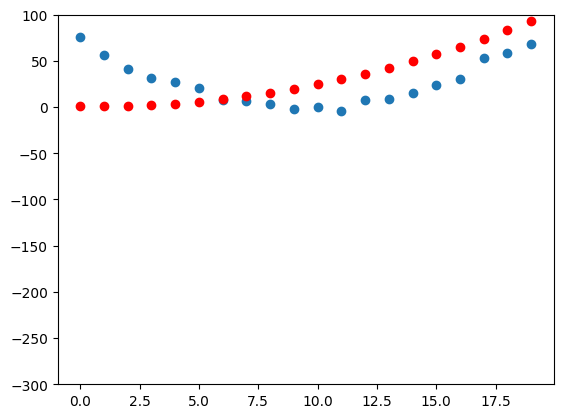

In [ ]:
show_preds(preds)

We need to repeat this a few times, so we’ll create a function to apply one step:

In [ ]:
def apply_step(params, prn=True):
 preds = f(time, params)
 loss = mse(preds, speed)
 loss.backward()
 params.data -= lr * params.grad.data
 params.grad = None
 if prn: print(loss.item())
 return preds

**Step 6: Repeat the process**<br>
Now we iterate. By looping and performing many improvements, we hope to reach a
good result:

In [ ]:
for i in range(10): apply_step(params)

1072.0758056640625
772.807861328125
716.17431640625
705.45458984375
703.4232177734375
703.0358276367188
702.9596557617188
702.9423217773438
702.9361572265625
702.9320068359375


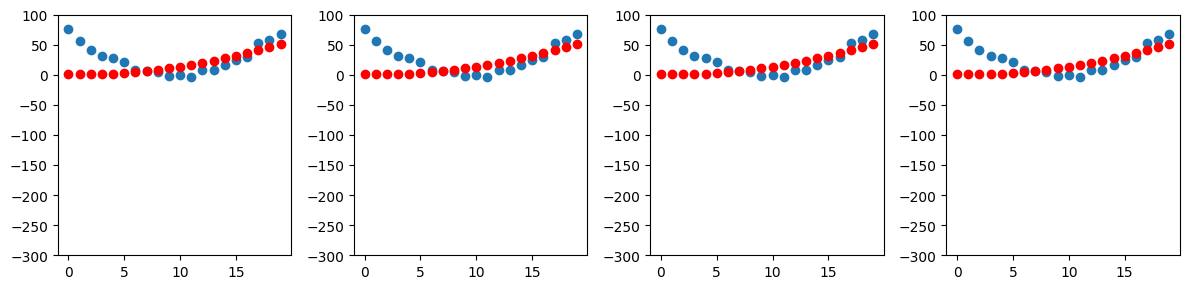

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

**Step 7: Stop**<br>
We just decided to stop after 10 epochs arbitrarily. In practice, we would watch the
training and validation losses and our metrics to decide when to stop, as we’ve
discussed.

## The MNIST Loss Function

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

We need a label for each image. We’ll use 1 for 3s and 0 for 7s:

In [ ]:
train_y = torch.tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A Dataset in PyTorch is required to return a tuple of (x,y) when indexed. Python
provides a zip function that, when combined with list, provides a simple way to get
this functionality:

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = torch.tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


Now we need an (initially random) weight for every pixel (this is the initialize step in
our seven-step process):

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

The function weights*pixels won’t be flexible enough—it is always equal to 0 when
the pixels are equal to 0 (i.e., its intercept is 0). You might remember from high school
math that the formula for a line is y=w*x+b; we still need the b. We’ll initialize it to a
random number too:

In [ ]:
bias = init_params(1)

We can now calculate a prediction for one image:

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([-11.5825], grad_fn=<AddBackward0>)

In Python, matrix multiplication is represented with the @ operator. Let’s try it:

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-11.5825],
        [ -7.6336],
        [ -6.2774],
        ...,
        [  0.2534],
        [ -0.8120],
        [ -9.5626]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [ True],
        [ True]])

In [ ]:
corrects.float().mean().item()

0.5769603252410889

Now let’s see what the change in accuracy is for a small change in one of the weights:

In [ ]:
weights[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
trgts = torch.tensor([1,0,1])
prds = torch.tensor([0.9, 0.4, 0.2])

In [ ]:
def mnist_loss(predictions, targets):
 return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [ ]:
mnist_loss(torch.tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

## Sigmoid

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

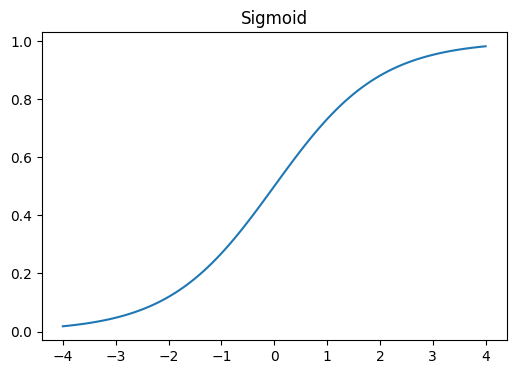

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
def mnist_loss(predictions, targets):
 predictions = predictions.sigmoid()
 return torch.where(targets==1, 1-predictions, predictions).mean()

## SGD and Mini-Batches

A DataLoader can take any Python collection and turn it into an iterator over many
batches, like so:

In [ ]:
from torch.utils.data import DataLoader

coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 2, 14,  3,  5, 12]),
 tensor([ 8,  0, 10, 11,  9]),
 tensor([ 1,  7,  6, 13,  4])]

In [ ]:
from fastai.data.core import L
import string

ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

When we pass a Dataset to a DataLoader we will get back many batches that are
themselves tuples of tensors representing batches of independent and dependent
variables:

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[[tensor([21,  4,  1, 10,  0, 20]), ('v', 'e', 'b', 'k', 'a', 'u')],
 [tensor([ 2,  5, 22, 17,  6, 19]), ('c', 'f', 'w', 'r', 'g', 't')],
 [tensor([11, 14, 15, 12, 24, 18]), ('l', 'o', 'p', 'm', 'y', 's')],
 [tensor([16,  9, 23,  3, 25,  8]), ('q', 'j', 'x', 'd', 'z', 'i')],
 [tensor([ 7, 13]), ('h', 'n')]]

## Putting It All Together

It’s time to implement the process we saw in Figure 4-1. In code, our process will be
implemented something like this for each epoch:

for x,y in dl:
 pred = model(x)
 loss = loss_func(pred, y)
 loss.backward()
 parameters -= parameters.grad * lr

First, let’s reinitialize our parameters:

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

A DataLoader can be created from a Dataset:

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = next(iter(dl))
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

We’ll do the same for the validation set:

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

Let’s create a mini-batch of size 4 for testing:

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[ 7.5226],
        [-0.8355],
        [11.4844],
        [ 1.2401]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.2306, grad_fn=<MeanBackward0>)

Now we can calculate the gradients:

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0152), tensor([-0.0964]))

Let’s put that all in a function:

In [ ]:
def calc_grad(xb, yb, model):
 preds = model(xb)
 loss = mnist_loss(preds, yb)
 loss.backward()

And test it:

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0304), tensor([-0.1928]))

But look what happens if we call it twice:

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0455), tensor([-0.2892]))

The gradients have changed! The reason for this is that loss.backward adds the gra‐
dients of loss to any gradients that are currently stored. So, we have to set the current
gradients to 0 first:

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

Our only remaining step is to update the weights and biases based on the gradient
and learning rate. When we do so, we have to tell PyTorch not to take the gradient of
this step too—otherwise, things will get confusing when we try to compute the deriv‐
ative at the next batch! If we assign to the data attribute of a tensor, PyTorch will not
take the gradient of that step. Here’s our basic training loop for an epoch:

In [ ]:
def train_epoch(model, lr, params):
 for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
        p.data -= p.grad*lr
        p.grad.zero_()

We also want to check how we’re doing, by looking at the accuracy of the validation
set. To decide if an output represents a 3 or a 7, we can just check whether it’s greater
than 0. So our accuracy for each item can be calculated (using broadcasting, so no
loops!) as follows:

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[ True],
        [False],
        [ True],
        [ True]])

That gives us this function to calculate our validation accuracy:

In [ ]:
def batch_accuracy(xb, yb):
 preds = xb.sigmoid()
 correct = (preds>0.5) == yb
 return correct.float().mean()

We can check it works:

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.7500)

And then put the batches together:

In [ ]:
def validate_epoch(model):
 accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
 return round(torch.stack(accs).mean().item(), 4)
validate_epoch(linear1)

0.7467

That’s our starting point. Let’s train for one epoch and see if the accuracy improves:

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7558

Then do a few more:

In [ ]:
for i in range(20):
 train_epoch(linear1, lr, params)
 print(validate_epoch(linear1), end=' ')

0.8813 0.9164 0.936 0.9477 0.9545 0.9599 0.9623 0.9658 0.9672 0.9692 0.9692 0.9711 0.9716 0.9721 0.9736 0.9736 0.9736 0.9745 0.9745 0.9745 

## Creating an Optimizer

nn.Linear does the same thing as our init_params and linear together. It contains
both the weights and biases in a single class. Here’s how we replicate our model from
the previous section:

In [ ]:
import torch.nn as nn

linear_model = nn.Linear(28*28,1)

Every PyTorch module knows what parameters it has that can be trained; they are
available through the parameters method:

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

We can use this information to create an optimizer:

In [ ]:
class BasicOptim:
 def __init__(self,params,lr): self.params,self.lr = list(params),lr
 def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr
 def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None

We can create our optimizer by passing in the model’s parameters:

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

Our training loop can now be simplified:

In [ ]:
def train_epoch(model):
 for xb,yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

Our validation function doesn’t need to change at all:

In [ ]:
validate_epoch(linear_model)

0.3716

Let’s put our little training loop in a function, to make things simpler:

In [ ]:
def train_model(model, epochs):
 for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

The results are the same as in the previous section:

In [ ]:
train_model(linear_model, 20)

0.4932 0.4932 0.665 0.8682 0.9199 0.9365 0.9507 0.959 0.9629 0.9658 0.9678 0.9697 0.9721 0.9731 0.9751 0.9761 0.977 0.9775 0.978 0.9785 

fastai provides the SGD class that, by default, does the same thing as our BasicOptim:

In [ ]:
import torch.optim as optim

linear_model = nn.Linear(28*28,1)
opt = optim.SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8828 0.8179 0.9072 0.9321 0.9458 0.9555 0.9619 0.9653 0.9678 0.9692 0.9712 0.9726 0.9741 0.9756 0.9765 0.9775 0.978 0.9785 0.9785 

fastai also provides Learner.fit, which we can use instead of train_model. To create
a Learner, we first need to create a DataLoaders, by passing in our training and vali‐
dation DataLoaders:

In [ ]:
from fastai.data.core import DataLoaders

dls = DataLoaders(dl, valid_dl)

To create a Learner without using an application (such as cnn_learner), we need to
pass in all the elements that we’ve created in this chapter: the DataLoaders, the
model, the optimization function (which will be passed the parameters), the loss
function, and optionally any metrics to print:

In [ ]:
from fastai.learner import Learner

learn = Learner(dls, nn.Linear(28*28,1), opt_func=optim.SGD,
 loss_func=mnist_loss, metrics=batch_accuracy)

Now we can call fit:

In [ ]:
learn.fit(10, lr=lr)

AttributeError: 'SGD' object has no attribute 'set_hypers'

## Adding a Nonlinearity

Here is the entire definition of a basic neural network:

In [ ]:
def simple_net(xb):
 res = xb@w1 + b1
 res = res.max(tensor(0.0))
 res = res@w2 + b2
 return res

That’s it! All we have in simple_net is two linear classifiers with a max function
between them.
Here, w1 and w2 are weight tensors, and b1 and b2 are bias tensors; that is, parameters
that are initially randomly initialized, just as we did in the previous section:

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

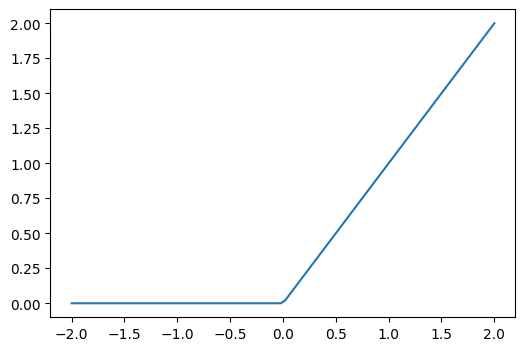

In [ ]:
plot_function(F.relu)

Just as in the previous section, we can replace this code with something a bit simpler
by taking advantage of PyTorch:

In [ ]:
simple_net = nn.Sequential(
 nn.Linear(28*28,30),
 nn.ReLU(),
 nn.Linear(30,1)
)

Because nn.Sequential is a module, we can get its parameters, which will return a
list of all the parameters of all the modules it contains. Let’s try it out! As this is a
deeper model, we’ll use a lower learning rate and a few more epochs:

In [48]:
learn = Learner(dls, simple_net, opt_func=optim.SGD,
 loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit_one_cycle(40, lr=0.1)

NameError: name 'Learner' is not defined

We’re not showing the 40 lines of output here to save room; the training process is
recorded in learn.recorder, with the table of output stored in the values attribute,
so we can plot the accuracy over training:

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

AttributeError: 'Sequential' object has no attribute 'values'

And we can view the final accuracy:

In [ ]:
learn.recorder.values[-1][2]

AttributeError: 'Sequential' object has no attribute 'values'

## Going Deeper

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
 loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)